# CS830 - Machine Learning for Data Analytics - Coursework 1

## Introduction

### Selected Problem

This report will focus on the challenging task of predicting the top genre that a song belongs to, utilising a dataset sourced from Spotify, which spans several decades of music data. This dataset is publicly available on [Kaggle](https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s) and encompasses various attributes of songs including but not limited to acoustic features, popularity scores and metadata such as artist and year of release.

### Report Structure

&ensp;&ensp;&ensp;&ensp;&ensp; **Data Cleaning & Preparation**

This report begins by addressing the challenges posed by the dataset's temporal diversity and potential inconsistencies, such as missing values and inaccurate year tags. A thorough data cleaning and preparation phase, is crucial to ensure the reliability and consistency of the data before it is used in predictive modeling. This stage includes handling missing values, correcting data anomalies, and standardizing data formats across different attributes.

&ensp;&ensp;&ensp;&ensp;&ensp; **Data Pre-Processing**

Following the initial cleaning, the dataset underwent a pre-processing stage where unnecessary features are dropped to simplify the model without compromising its predictive power. Feature encoding is applied to transform categorical data into a machine-readable format. Additionally, dimensionality reduction techniques are employed to extract the most relevant features for genre classification, thereby enhancing the efficiency of the subsequent modelling process.

&ensp;&ensp;&ensp;&ensp;&ensp; **Model Development**

The cleaned and pre-processed data is then fed into several classification models to determine which best predicts the genre of a song. The models tested include:

-   Logistic Regression
-   Decision Tree
-   Support Vector Machine (SVM)
-   Gradient Boosting Classifier
-   AdaBoost Classifier
-   Extra Trees Classifier
-   Voting Classifier
-   Stacking Classifier

Each model is evaluated based on its performance metrics, computational efficiency, and suitability for handling the specific characteristics of our dataset.

&ensp;&ensp;&ensp;&ensp;&ensp; **Evaluation**

This chapter focuses on the detailed evaluation of each model. This includes comparing performance metrics such as accuracy, precision, recall, and F1-score across all models.

&ensp;&ensp;&ensp;&ensp;&ensp; **Conclusion and Recommendations**

Based on the empirical work, this section will articulate the final recommendation on the most suitable model(s) for genre classification. It will also discuss potential improvements and future directions for research, considering the limitations observed during the model development and evaluation stages.


### Packages Used

Python Version: 3.12.2

External Packages Used: numpy, pandas, matplotlib, sklearn, umap, seaborn, category_encoders

Software: Visual Studio Code, Jupyter Notebook

In [11]:
import numpy as np
import os
import pandas as pd

### Summary of the Dataset

In [12]:
# Disabling console warnings
import warnings
warnings.filterwarnings('ignore')

directory_path = './song_data' 
dataframes = []

# Merging the files into a single DataFrame
for file in os.listdir(directory_path):
    if file.endswith('.csv'):
        file_path = os.path.join(directory_path, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

print(f"The dataset has a shape of: {df.shape}.")
print(f"There are {df['artist'].nunique()} unique artists in the dataset.")
print(f"There are {df['top genre'].nunique()} unique genres in the dataset. \n")
print(df.info())
df.head()

The dataset has a shape of: (667, 15).
There are 469 unique artists in the dataset.
There are 115 unique genres in the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     667 non-null    int64 
 1   title      667 non-null    object
 2   artist     667 non-null    object
 3   top genre  651 non-null    object
 4   year       667 non-null    int64 
 5   bpm        667 non-null    int64 
 6   nrgy       667 non-null    int64 
 7   dnce       667 non-null    int64 
 8   dB         667 non-null    int64 
 9   live       667 non-null    int64 
 10  val        667 non-null    int64 
 11  dur        667 non-null    int64 
 12  acous      667 non-null    int64 
 13  spch       667 non-null    int64 
 14  pop        667 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 78.3+ KB
None


,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79
1,2,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76
2,3,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,76
3,4,"Because You Loved Me (Theme from ""Up Close and...",CÃ©line Dion,canadian pop,1996,120,47,61,-10,10,18,274,31,3,74
4,5,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,74


## Data Cleaning & Preparation

### Missing Values

Rows that contained missing genre and values were removed from the dataset.

In [13]:
missing_values = df.isnull().sum()
print(missing_values)
df = df.dropna()

Number        0
title         0
artist        0
top genre    16
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64


### Duplicates

Duplicates were removed from the data rather than marking them as re-releases. It was predicted that re-releases would not contribute significantly to the genre classification problem and they added unnecessary complexity.


In [14]:
# Provide Information about re-releases
duplicate_songs = df.duplicated(subset=['title', 'artist'], keep=False)
print("Number of songs affected by potential re-releases:", duplicate_songs.sum())

duplicates_df = df[duplicate_songs].sort_values(by=['title', 'artist', 'year'])
print(duplicates_df[['title', 'artist', 'year']])

Number of songs affected by potential re-releases: 14
                                           title            artist  year
318                             Break Your Heart         Taio Cruz  2010
463                             Break Your Heart         Taio Cruz  2011
280                                     Dynamite         Taio Cruz  2010
462                                     Dynamite         Taio Cruz  2011
90                      Everybody Loves Somebody       Dean Martin  2013
628                     Everybody Loves Somebody       Dean Martin  2014
216                    Guilty (feat. Barry Gibb)  Barbra Streisand  1980
508                    Guilty (feat. Barry Gibb)  Barbra Streisand  1980
276                                 Hall of Fame        The Script  2012
414                                 Hall of Fame        The Script  2012
88                  Put Your Head On My Shoulder         Paul Anka  2000
578                 Put Your Head On My Shoulder         Paul Anka  20

In [15]:
# Sort by 'title', 'artist', 'year' to ensure the latest version is kept
df.sort_values(by=['title', 'artist', 'year'], inplace=True)

# Drop duplicates, keeping the last entry
df = df.drop_duplicates(subset=['title', 'artist'], keep='last')

# Saving to pdf for future use
df.to_csv('cleaned_data.csv', index=False)

# Check the dataset
print(df.shape)

(644, 15)


## Data Pre-Processing

### Feature Selection

The features can be divided into several categories, each with varying levels of importance for creating classification models, which determine their inclusion in the dataset.

Acoustic Features: Attributes like danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, and tempo; these are very influential in determining the genre of music because they directly describe the musical elements of the track.

Contextual Features: Attributes like the year of release can also be important if musical genres are influenced by trends over time.

Identifiers: Any column that serves as an identifier, such as song IDs, track URLs, or artist names, should be excluded from the feature set as these do not have predictive power regarding the genre.

Text-based Features: Unless specifically analysing lyrics or using advanced techniques like natural language processing (NLP), columns containing large text data like song names or album names are generally not directly used for genre classification based on acoustic features.

In [16]:
# Feature Selection - dropping irrelavant columns
df_artist = df.drop(['Number', 'title'], axis=1)
df = df.drop(['Number', 'title', 'artist'], axis=1)

### Encoding Method

Encoding the artist and genre fields provides a unique challenge due to the small size of the dataset. There are several encoding methods that could be implemented:

1. **One-Hot Encoding:** Maintains categorical separation without implying any order or relationship among artists but results in a large increase in features.

2. **Label Encoding:** Keeps feature space smaller but imposes an artificial ordinal relationship which is not meaningful.

3. **Binary Encoding:** Space-efficient way of vectorising features, useful when high number of categories and want to avoid dimensionality increase of one-hot encoding.

Binary encoding was selected as the most appropriate method for the artists while label encoding was selected for the genre.

In [17]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder for 'top genre'
label_encoder = LabelEncoder()
df['top genre'] = label_encoder.fit_transform(df['top genre'])

# Apply binary encoding to artist
encoder = ce.BinaryEncoder(cols=['artist'])
df_artist = encoder.fit_transform(df_artist)

print(f"Shape of dataframe: {df.shape}")
print(f"Shape of dataframe with artist encoding: {df_artist.shape}")

Shape of dataframe: (644, 12)
Shape of dataframe with artist encoding: (644, 21)


### Creating a Scaled Dataset

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = df[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']]
scaled_df_without_artists = scaler.fit_transform(features)

# Second dataframe with artists
features = df_artist.drop('top genre', axis=1)
scaled_df_with_artists = scaler.fit_transform(features)

### Dimensionality Reduction

Dimensionality reduction is a process used in machine learning and statistics to reduce the number of random variables under consideration. (Jolliffe & Cadima, 2024) It simplifies models, reduces computation time, and can help mitigate issues related to the "curse of dimensionality". The curse of dimensionality is a phenomenon that arises when you work with data in high-dimensional spaces that do not exist in low-dimensional spaces. Some methods of dimensionality reduction are:

1. **Principal Component Analysis (PCA):** This technique transforms the data into a new coordinate system such that the directions (principal components) capturing the largest variation in data can be easily identified.

2. **Linear Discriminant Analysis (LDA):** Used to find a linear combination of features that best separate two or more classes of objects or events.

3. **T-Distributed Stochastic Neighbour Embedding:** This method is well suited for the visualisation of high-dimensional data by reducing it to two or three dimensions.

4. **Uniform Manifold Approximation and Projection (UMAP):** Constructs a high dimensional graph representation of the data, and the optimises a low-dimensional graph that maintains the essential structure. (McInnes, Healy, & Melville, 2018)

For the song data, the Uniform Manifold Approximation and Project method was selected for dimensionality reduction was selected. Principal component analysis was considered since most of the variables were numerical, however it might not have provided the best separation by genres since it focuses on variance rather than the clustering structure. Both methods will be looked at for a basis of comparison.

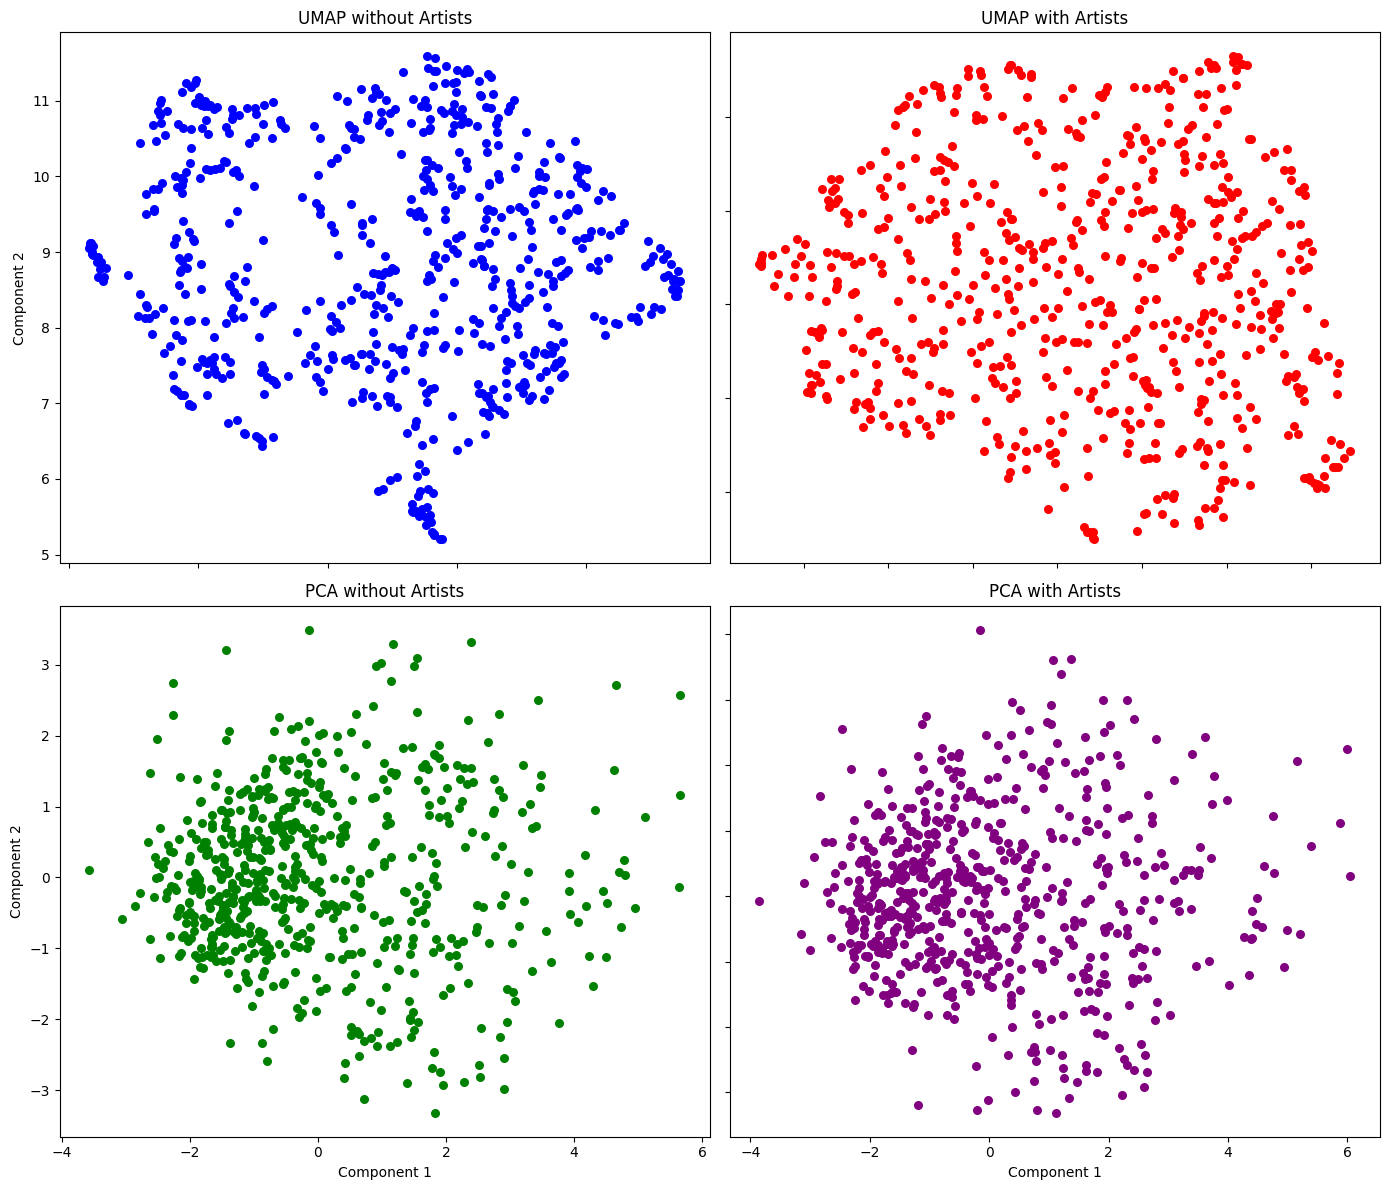

In [29]:
# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap

# UMAP Method

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(scaled_df_without_artists)

reducer_with_artist = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding_artist = reducer_with_artist.fit_transform(scaled_df_with_artists)

# PCA method

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_without_artists)

pca = PCA(n_components=2)
pca_result_artist = pca.fit_transform(scaled_df_with_artists)

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# UMAP without artists
axs[0, 0].scatter(umap_embedding[:, 0], umap_embedding[:, 1], c='blue', cmap='Spectral', s=30)
axs[0, 0].set_title('UMAP without Artists')

# UMAP with artists
axs[0, 1].scatter(umap_embedding_artist[:, 0], umap_embedding_artist[:, 1], c='red', cmap='Spectral', s=30)
axs[0, 1].set_title('UMAP with Artists')

# PCA without artists
axs[1, 0].scatter(pca_result[:, 0], pca_result[:, 1], c='green', cmap='Spectral', s=30)
axs[1, 0].set_title('PCA without Artists')

# PCA with artists
axs[1, 1].scatter(pca_result_artist[:, 0], pca_result_artist[:, 1], c='purple', cmap='Spectral', s=30)
axs[1, 1].set_title('PCA with Artists')

# Adjust layout and display the plot
for ax in axs.flat:
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.label_outer()

plt.tight_layout()
plt.show()

#### Above Image

The image shows four scatter plots generated using two different dimensionality reduction techniques, UMAP and PCA, applied to two versions of the dataset: one with the 'artist' feature included and one without.

#### UMAP vs PCA

UMAP produces a more dispersed structure with areas of higher density, indicating that it captures the nuanced relationships between the data points. This often reveals more complex patterns and potential clusters that may not be apparent with linear methods.

PCA tends to produce tighter clustering around the centre with points spread out along the primary axes of variance. This indicates that PCA captures the main sources of variance in the data but may miss complex, non-linear relationships.

### Dataset With and Without Artists

The UMAP without artists shows a more dispersed structure with clearer areas of higher density, this suggests that the musical features alone provide good separation among the songs.

The UMAP with artists shows a denser more uniform distribution of points, this indicates that the artist feature does influence the separation, but it might overshadow other distinguishing features.

For the PCA it is hard to tell a difference between the two different datasets, this suggests that the artist feature might add some variance but does not drastically change the overall structure.

### Recommendation

For capturing the intrinsic properties of songs and building a model, UMAP without artists would be the most suitable dataset moving forward.


### Keeping the Original Dataset

For this report I will perform tests on both the "Scaled Data without UMAP" and "Scaled Data with UMAP". This is because I believe that since this is a classification problem with a lesser focus on clustering, the "Scaled Data without UMAP" may receive better results whereas, "Scaled Data with UMAP" may receive lower scores but perform faster.


### Creating Training and Test Data

Note scaling was performed after the train-test split and not before, this prevents information leakage from the test set into the training set during the scaling process.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
import time

features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
X_train, X_test, y_train, y_test = train_test_split(df[features], df['top genre'], test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_train_ump = reducer.fit_transform(X_train_scaled)
X_test_ump = reducer.transform(X_test_scaled)

print(f"Training set shape scaled: {X_train_scaled.shape}")
print(f"Test set shape scaled: {X_test_scaled.shape}")

print(f"Training set shape with UMAP: {X_train_ump.shape}")
print(f"Test set shape with UMAP: {X_test_ump.shape}")


Training set shape scaled: (515, 11)
Test set shape scaled: (129, 11)
Training set shape with UMAP: (515, 2)
Test set shape with UMAP: (129, 2)


### Evaluation Metrics

To compare the different models tests several metrics were used to evaluate its overall performance, these include:

1. **Accuracy:** Measures the overall correctness of the model, calculated as the ratio of correct predictions to the total number of predictions made.

2. **Precision:** Measures the accuracy of positive predictions, the ratio of true positives to the sum of true and false positives.

3. **Recall:** Ability of model to find true positives within a dataset.

4. **F1 Score:** Harmonic mean of precision and recall. (Evidently AI, 2024)

Results Data frame objects for both the non-UMAP and UMAP data has been created to store the performance data. Given the small and imbalanced dataset each calculation for the Precision, Recall, F1 Score will use the weighted average method to account for the class imblaance while reflecting the true performance across all classes.

In [34]:
# Structure of the DataFrame 
data = {
    'Type': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Train Time (s)': [],  
    'Number of Parameters': [] 
}

results_df_s = pd.DataFrame(data)
results_df_umap = pd.DataFrame(data)

In [32]:
# Helper Function below to show model results

def display_model_results(results: pd.DataFrame) -> None:
    """
    Prints performance metrics for a logistic regression model from a DataFrame row.
    
    Args:
    results (pd.DataFrame): A DataFrame with a single row containing metrics. Expected
                            columns: 'Type', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
                            'Train Time (s)', and 'Number of Parameters'.
    
    Returns:
    None: Outputs metrics to the console.
    """
    result = results.iloc[0]
    print(f"Model Type: {result['Type']}")
    print(f"Accuracy: {result['Accuracy']*100:.2f}%")
    print(f"Precision: {result['Precision']*100:.2f}%")
    print(f"Recall: {result['Recall']*100:.2f}%")
    print(f"F1 Score: {result['F1 Score']*100:.2f}%")
    print(f"Training Time (seconds): {result['Train Time (s)']:.2f}")
    print(f"Number of Parameters: {result['Number of Parameters']}\n")
    

## Model Development

### Logistic Regression

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation (Kanade, 2024), this makes it appropriate for predicting song genres based on the defined set of input features such as bpm, energy, danceability et cetera.

In [35]:
from sklearn.linear_model import LogisticRegression

def test_logistic_regression(X_train, X_test, y_train, y_test, df) -> pd.DataFrame:
    """
    Trains a Logistic Regression model, makes predictions, and evaluates performance metrics on the test data.
    Appends results including accuracy, precision, recall, F1 score, and training metrics to the provided DataFrame.
    
    Args:
        X_train (pd.DataFrame): Training feature dataset.
        X_test (pd.Box below for test features.
        X_test (Dt): [train, x_train]: target dataset on preprocess data.
        y_test (Dt_box): BBox change.eature nputr):
    
    Returns:
        pd.DataFrame: Updated DataFrame with new model results.
    """
    start_time = time.perf_counter()
    model = LogisticRegression()
    model.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time

    # Predict and calculate metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    num_parameters = model.coef_.size + model.intercept_.size

    # Append to results DataBase
    new_model_results = pd.DataFrame({
        'Type': ['Logistic Regression'],
        'Accuracy': [round(accuracy, 2)],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1 Score': [round(f1, 2)],
        'Train Time (s)': [round(train_time, 2)],
        'Number of Parameters': [int(num_parameters)]
    })
    df = pd.concat([df, new_model_results], ignore_index=True)
    display_model_results(new_model_results)

    return df

results_df_s  = test_logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test, results_df_s)
results_df_umap = test_logistic_regression(X_train_ump, X_test_ump, y_train, y_test, results_df_umap)



Model Type: Logistic Regression
Accuracy: 31.00%
Precision: 18.00%
Recall: 31.00%
F1 Score: 22.00%
Training Time (seconds): 0.29
Number of Parameters: 1200

Model Type: Logistic Regression
Accuracy: 29.00%
Precision: 13.00%
Recall: 29.00%
F1 Score: 18.00%
Training Time (seconds): 0.07
Number of Parameters: 300



### Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. bpm, energy), each branch represents the outcome of the test and each leaf node represents a class variable (Kulkarni, 2017). This type of model had the potential useful in classifying song genres as it can handle complex, nonlinear relationships between features.

In [41]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_classifier(X_train, X_test, y_train, y_test, df) -> pd.DataFrame:
    """
    Fits a Decision Tree classifier on the training data, makes predictions, and evaluates
    the performance on the test data. Appends the evaluation metrics to a provided DataFrame.
    
    Args:
        X_train (pd.DataFrame): Training feature dataset.
        X_test (pd.DataFrame): Test feature dataset.
        y_train (pd.Series): Training target dataset.
        y_test (pd.Series): Test target dataset.
        df (pd.DataFrame): DataFrame to append the results to.

    Returns:
        pd.DataFrame: Updated DataFrame with new model results.
    """
    start_time = time.perf_counter()
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time
    
    y_pred = dt_model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    num_parameters = dt_model.tree_.node_count

    new_model_results = pd.DataFrame({
        'Type': ['Decision Tree'],
        'Accuracy': [round(accuracy, 2)],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1 Score': [round(f1, 2)],
        'Train Time (s)': [round(train_time, 2)],
        'Number of Parameters': [num_parameters]
    })
    
    df = pd.concat([df, new_model_results], ignore_index=True)
    display_model_results(new_model_results)
    
    return df

results_df_s  = decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test, results_df_s)
results_df_umap = decision_tree_classifier(X_train_ump, X_test_ump, y_train, y_test, results_df_umap)

Model Type: Decision Tree
Accuracy: 18.00%
Precision: 22.00%
Recall: 18.00%
F1 Score: 19.00%
Training Time (seconds): 0.02
Number of Parameters: 601

Model Type: Decision Tree
Accuracy: 13.00%
Precision: 14.00%
Recall: 13.00%
F1 Score: 13.00%
Training Time (seconds): 0.01
Number of Parameters: 773



The decision tree shown below addresses this problem. The multiple levels of decision nodes, which are arranged in a hierarchical manner, provide a somewhat complicated but detailed view of breaking down the features that influence genre categorisation.

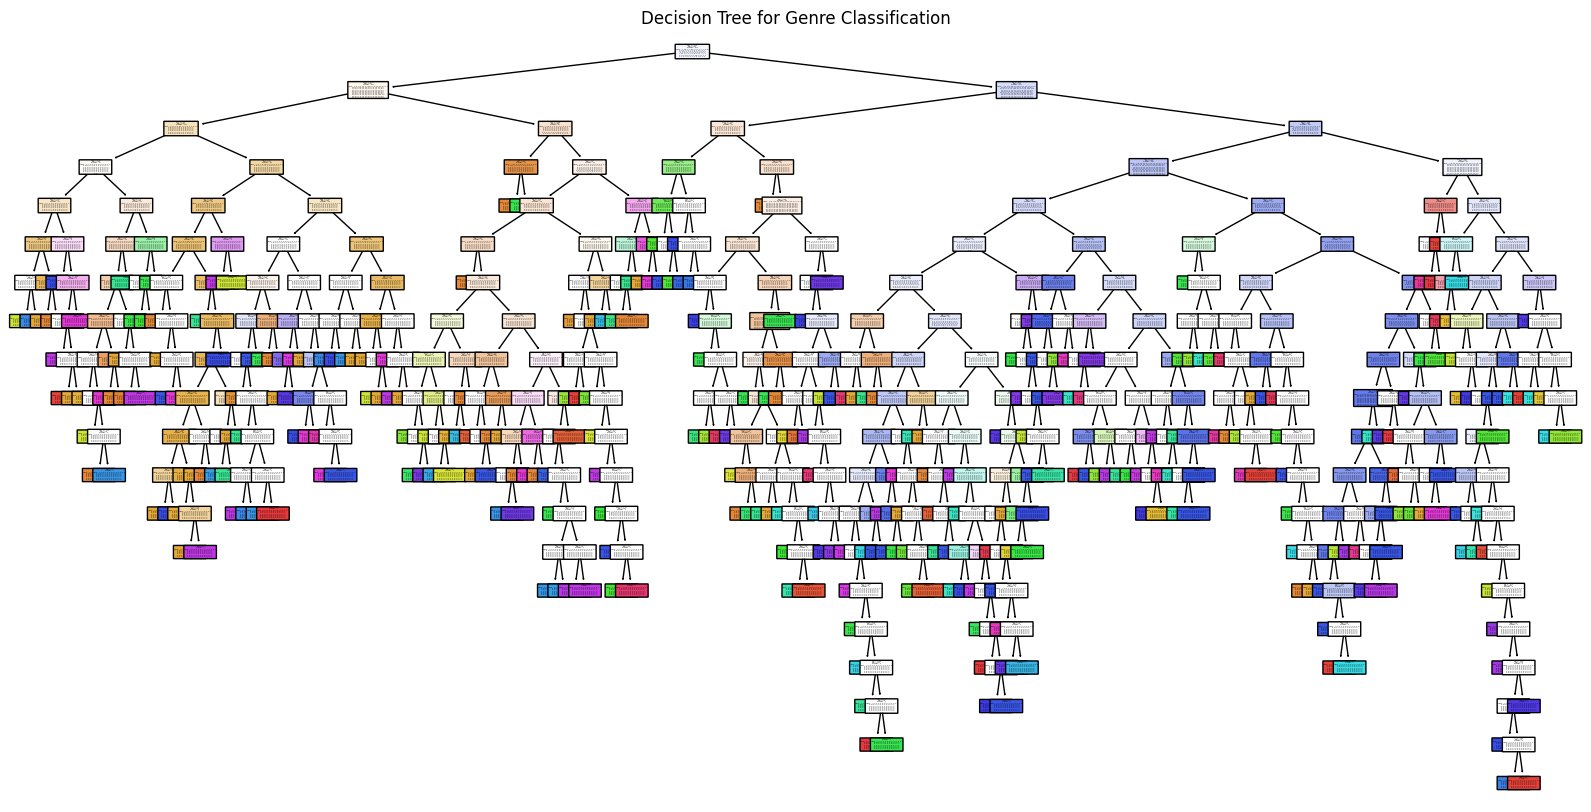

In [42]:
from sklearn.tree import plot_tree

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred = dt_model.predict(X_test)

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=features, rounded=True, proportion=False, precision=2)
plt.title("Decision Tree for Genre Classification")
plt.show()

### Random Forest

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the class that is either the mode of the classes or the mean prediction of the individual trees.

The ensemble approach might help reduce overfitting and handle high dimensionality effectively; however, Random Forests can be computationally intensive and require more resources in terms of memory and processing time.

In [43]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_classifier(X_train, X_test, y_train, y_test, df) -> pd.DataFrame:
    """
    Fits a Random Forest classifier on the training data, makes predictions, and evaluates
    the performance on the test data. Appends the evaluation metrics to a provided DataFrame.
    
    Args:
        X_train (pd.DataFrame): Training feature dataset.
        X_test (pd.DataFrame): Test feature dataset.
        y_train (pd.Series): Training target dataset.
        y_test (pd.Series): Test target dataset.
        df (pd.DataFrame): DataFrame to append the results to.

    Returns:
        pd.DataFrame: Updated DataFrame with new model results.
    """


    start_time = time.perf_counter()
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time

    y_pred = rf_model.predict(X_test)

    # Gather Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    num_parameters = sum(tree.tree_.node_count for tree in rf_model.estimators_)

    # Append to results DataBase
    new_model_results = pd.DataFrame({
        'Type': ['Random Forest'],
        'Accuracy': [round(accuracy, 2)],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1 Score': [round(f1, 2)],
        'Train Time (s)': [round(train_time, 2)],
        'Number of Parameters': [int(num_parameters)]
    })
    df = pd.concat([df, new_model_results], ignore_index=True)
    display_model_results(new_model_results)
    
    return df


results_df_s  = random_forest_classifier(X_train_scaled, X_test_scaled, y_train, y_test, results_df_s)
results_df_umap = random_forest_classifier(X_train_ump, X_test_ump, y_train, y_test, results_df_umap)

Model Type: Random Forest
Accuracy: 33.00%
Precision: 21.00%
Recall: 33.00%
F1 Score: 24.00%
Training Time (seconds): 0.75
Number of Parameters: 43884

Model Type: Random Forest
Accuracy: 19.00%
Precision: 15.00%
Recall: 19.00%
F1 Score: 16.00%
Training Time (seconds): 0.20
Number of Parameters: 52054



### Support Vector Machine

Support Vector Machines are supervised learning models used for classification and regression tasks. The key idea behind SVMs is to find the hyperplane that best separates the data into different classes (Mathworks, 2024).

The SVM first finds the optimal hyperplane that maximizes the margin between the different classes; the margin is the distance between the hyperplane and the nearest data points from each class, known as support vectors.

SVMs can use kernel functions to handle relationships. In this example, we will try RBF, linear, polynomial, and sigmoid kernels. The one with the highest accuracy will be recorded, and a full evaluation will be performed on it.

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import pandas as pd

def test_svm_models(X_train, X_test, y_train, y_test, df) -> pd.DataFrame:
    """
    Fits SVM classifiers with different kernels on the training data, selects the best model based on 
    test accuracy, and evaluates the performance on the test data. Appends the evaluation metrics of the 
    best model to a provided DataFrame.
    
    Args:
        X_train (pd.DataFrame): Training feature dataset.
        X_test (pd.DataFrame): Test feature dataset.
        y_train (pd.Series): Training target dataset.
        y_test (pd.Series): Test target dataset.
        df (pd.DataFrame): DataFrame to append the results to.

    Returns:
        pd.DataFrame: Updated DataFrame with new model results.
    """
    # Initialize the SVM models with different kernels
    svm_rbf = SVC(kernel='rbf', random_state=42)
    svm_linear = SVC(kernel='linear', random_state=42)
    svm_poly = SVC(kernel='poly', degree=3, random_state=42)  # degree can be adjusted
    svm_sigmoid = SVC(kernel='sigmoid', random_state=42)

    # List of models
    models = {
        "RBF Kernel": svm_rbf,
        "Linear Kernel": svm_linear,
        "Polynomial Kernel": svm_poly,
        "Sigmoid Kernel": svm_sigmoid
    }

    max_accuracy = 0
    best_model = None

    # Fit models and find the one with highest accuracy
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > max_accuracy:
            best_model = model
            max_accuracy = accuracy

    # Run the best model
    start_time = time.perf_counter()
    best_model.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time

    y_pred = best_model.predict(X_test)

    # Gather Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate number of parameters
    if best_model.kernel == 'linear':
        num_parameters = best_model.coef_.size + best_model.intercept_.size
    else:
        num_parameters = len(best_model.support_vectors_)

    # Append to results DataBase
    new_model_results = pd.DataFrame({
        'Type': ['SVM'],
        'Accuracy': [round(accuracy, 2)],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1 Score': [round(f1, 2)],
        'Train Time (s)': [round(train_time, 2)],
        'Number of Parameters': [int(num_parameters)]
    })
    df = pd.concat([df, new_model_results], ignore_index=True)
    display_model_results(new_model_results)
    
    return df

results_df_s  = test_svm_models(X_train_scaled, X_test_scaled, y_train, y_test, results_df_s)
results_df_umap = test_svm_models(X_train_ump, X_test_ump, y_train, y_test, results_df_umap)

Model Type: SVM
Accuracy: 36.00%
Precision: 16.00%
Recall: 36.00%
F1 Score: 22.00%
Training Time (seconds): 0.03
Number of Parameters: 513

Model Type: SVM
Accuracy: 29.00%
Precision: 13.00%
Recall: 29.00%
F1 Score: 18.00%
Training Time (seconds): 0.03
Number of Parameters: 509



### K-Means Clustering

For the problem of genre classification, it was decided not to use or test K-means clustering. This is because it is an unsupervised learning method mainly used for clustering, not classification. While a model of this type might have provided some insight into the structure of the data, it would not directly solve the classification problem.

### Gradient Boosting Classifier

Gradient Boosting is an ensemble learning technique that builds a model in a stage-wise fashion from weak learners, typically decision trees, and then optimizes it by minimising a loss function. Each new tree corrects the errors of the previous trees. Unlike random forests, which work in parallel, boosting builds trees sequentially, where each tree attempts to correct the errors of the preceding one (Data Headhunters, 2024).

Given the benefits of high predictive performance and the ability to handle complex feature interactions, gradient boosting is worth exploring for genre classification.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

def test_gradient_boosting_classifier(X_train, X_test, y_train, y_test, df) -> (pd.DataFrame, int):
    """
    Fits a Gradient Boosting classifier on the training data, makes predictions, and evaluates
    the performance on the test data. Appends the evaluation metrics to a provided DataFrame.

    Args:
        X_train (pd.DataFrame): Training feature dataset.
        X_test (pd.DataFrame): Test feature dataset.
        y_train (pd.Series): Training target dataset.
        y_test (pd.Series): Test target dataset.
        df (pd.DataFrame): DataFrame to append the results to.

    Returns:
        pd.DataFrame: Updated DataFrame with new model results.
        int: Total number of decision tree nodes used in the model's estimations.
    """

    start_time = time.perf_counter()
    # Uses recommended default values
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_clf.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time

    y_pred = gb_clf.predict(X_test)

    # Gather Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    num_parameters_gb = sum(estimator.tree_.node_count for estimator in gb_clf.estimators_[:, 0])

    # Append to results DataBase
    new_model_results = pd.DataFrame({
        'Type': ['Gradient Boosting'],
        'Accuracy': [round(accuracy, 2)],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1 Score': [round(f1, 2)],
        'Train Time (s)': [round(train_time, 2)],
        'Number of Parameters': [int(num_parameters_gb)]
    })
    df = pd.concat([df, new_model_results], ignore_index=True)
    display_model_results(new_model_results)
    
    return df, num_parameters_gb

results_df_s, num_param_gb  = test_gradient_boosting_classifier(X_train_scaled, X_test_scaled, y_train, y_test, results_df_s)
results_df_umap, num_param_gb_ump = test_gradient_boosting_classifier(X_train_ump, X_test_ump, y_train, y_test, results_df_umap)

Model Type: Gradient Boosting
Accuracy: 23.00%
Precision: 22.00%
Recall: 23.00%
F1 Score: 22.00%
Training Time (seconds): 10.05
Number of Parameters: 1464

Model Type: Gradient Boosting
Accuracy: 17.00%
Precision: 17.00%
Recall: 17.00%
F1 Score: 17.00%
Training Time (seconds): 5.08
Number of Parameters: 1488



### Ada Classifier

AdaBoost (Adaptive Boosting) is another ensemble learning method that combines multiple weak learners to form a strong learner. Unlike gradient boosting, which sequentially minimises the residuals, AdaBoost focuses on adjusting the weights of incorrectly classified instances (Data Headhunters, 2024). For genre classification, AdaBoost could be beneficial due to its ability to enhance the performance of simple models by focusing on the harder-to-classify songs.

In [46]:
from sklearn.ensemble import AdaBoostClassifier

def test_ada_boost_classifier(X_train, X_test, y_train, y_test, df) -> (pd.DataFrame, int):
    """
    Fits an AdaBoost classifier on the training data, makes predictions, and evaluates
    the performance on the test data. Appends the evaluation metrics to a provided DataFrame.
    
    Args:
        X_train (pd.DataFrame): Training feature dataset.
        X_test (pd.DataFrame): Test feature dataset.
        y_train (pd.Series): Training target dataset.
        y_test (pd.Series): Test target dataset.
        df (pd.DataFrame): DataFrame to append the results to.

    Returns:
        pd.DataFrame: Updated DataFrame with new model results.
        int: Total number of decision tree nodes used in the model's estimators.
    """

    start_time = time.perf_counter()
    # Uses recommended default values
    ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    ada_clf.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time

    y_pred = ada_clf.predict(X_test)

    # Gather Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    num_parameters_ad = sum(estimator.tree_.node_count for estimator in ada_clf.estimators_)

    # Append to results DataBase
    new_model_results = pd.DataFrame({
        'Type': ['Ada'],
        'Accuracy': [round(accuracy, 2)],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1 Score': [round(f1, 2)],
        'Train Time (s)': [round(train_time, 2)],
        'Number of Parameters': [int(num_parameters_ad)]
    })
    df = pd.concat([df, new_model_results], ignore_index=True)
    display_model_results(new_model_results)
    
    return df, num_parameters_ad


results_df_s, num_param_ad  = test_ada_boost_classifier(X_train_scaled, X_test_scaled, y_train, y_test, results_df_s)
results_df_umap, num_param_ad_ump = test_ada_boost_classifier(X_train_ump, X_test_ump, y_train, y_test, results_df_umap)

Model Type: Ada
Accuracy: 36.00%
Precision: 22.00%
Recall: 36.00%
F1 Score: 25.00%
Training Time (seconds): 0.14
Number of Parameters: 300

Model Type: Ada
Accuracy: 22.00%
Precision: 13.00%
Recall: 22.00%
F1 Score: 15.00%
Training Time (seconds): 0.13
Number of Parameters: 300



### Extra Tree Classifier

Extra Trees Classifier is an ensemble learning method that builds multiple decision trees and aggregates their results to improve predictive performance and robustness. It is like a random forest, but splits are made more randomly and unlike Random Forests which use bootstrapped samples, Extra Trees use the whole original  sample to build each tree.


In [47]:
from sklearn.ensemble import ExtraTreesClassifier

def test_extra_trees_classifier(X_train, X_test, y_train, y_test, df) -> (pd.DataFrame, int):
    """
    Fits an Extra Trees classifier on the training data, makes predictions, and evaluates
    the performance on the test data. Appends the evaluation metrics to a provided DataFrame.
    
    Args:
        X_train (pd.DataFrame): Training feature dataset.
        X_test (pd.DataFrame): Test feature dataset.
        y_train (pd.Series): Training target dataset.
        y_test (pd.Series): Test target dataset.
        df (pd.DataFrame): DataFrame to append the results to.

    Returns:
        pd.DataFrame: Updated DataFrame with new model results.
        int: Total number of decision tree nodes used in the model's estimators.
    """

    start_time = time.perf_counter()
    et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
    et_clf.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time

    y_pred = et_clf.predict(X_test)

    # Gather Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    num_parameters_et = sum(tree.tree_.node_count for tree in et_clf.estimators_)

    # Append to results DataBase
    new_model_results = pd.DataFrame({
        'Type': ['Extra Tree'],
        'Accuracy': [round(accuracy, 2)],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1 Score': [round(f1, 2)],
        'Train Time (s)': [round(train_time, 2)],
        'Number of Parameters': [int(num_parameters_et)]
    })
    df = pd.concat([df, new_model_results], ignore_index=True)
    display_model_results(new_model_results)
    
    return df, num_parameters_et


results_df_s, num_param_et  = test_extra_trees_classifier(X_train_scaled, X_test_scaled, y_train, y_test, results_df_s)
results_df_umap, num_param_et_ump = test_extra_trees_classifier(X_train_ump, X_test_ump, y_train, y_test, results_df_umap)

Model Type: Extra Tree
Accuracy: 30.00%
Precision: 21.00%
Recall: 30.00%
F1 Score: 22.00%
Training Time (seconds): 0.12
Number of Parameters: 83516

Model Type: Extra Tree
Accuracy: 21.00%
Precision: 15.00%
Recall: 21.00%
F1 Score: 18.00%
Training Time (seconds): 0.09
Number of Parameters: 96210



## Voting Classifier

The Voting Classifier functions similarly to an electoral system, where a prediction for a new data point is determined by a "vote" from a group of machine learning models (Afolabi, 2020).

There are two types of voting in this context:

-   **Hard Voting**: This method predicts the class label that is chosen by the majority of the base classifiers.
-   **Soft Voting**: This method predicts the class label based on the average of the predicted probabilities from all the base classifiers.

In this example, we will utilise hard voting and incorporate the Gradient Boosting Classifier, AdaBoost Classifier, and Extra Trees Classifier to build our model.

In [48]:
from sklearn.ensemble import VotingClassifier

def test_voting_classifier(X_train, X_test, y_train, y_test, df, num_parameters_gb, num_parameters_ad, num_parameters_et) -> pd.DataFrame:
    """
    Fits a Voting classifier using Gradient Boosting, AdaBoost, and Extra Trees classifiers on the training data,
    makes predictions, and evaluates the performance on the test data. Appends the evaluation metrics to a provided DataFrame.
    
    Args:
        X_train (pd.DataFrame): Training feature dataset.
        X_test (pd.DataFrame): Test feature dataset.
        y_train (pd.Series): Training target dataset.
        y_test (pd.Series): Test target dataset.
        df (pd.DataFrame): DataFrame to append the results to.

    Returns:
        pd.DataFrame: Updated DataFrame with new model results.
    """

    # Reusing the individual classifiers
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

    # Creating Stacking Classifier - Reusing Gradient Boosting, Ada Boosting and Extra Tree Classifiers
    voting_clf = VotingClassifier(
        estimators=[
            ('gb', gb_clf),
            ('ada', ada_clf),
            ('et', et_clf)
        ],
        voting='hard'
    )

    start_time = time.perf_counter()
    voting_clf.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time

    y_pred = voting_clf.predict(X_test)

    # Gather Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Sum all nodes for a rough "complexity measure"
    num_parameters = num_parameters_gb + num_parameters_ad + num_parameters_et

    # Append to results DataBase
    new_model_results = pd.DataFrame({
        'Type': ['Voting'],
        'Accuracy': [round(accuracy, 2)],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1 Score': [round(f1, 2)],
        'Train Time (s)': [round(train_time, 2)],
        'Number of Parameters': [int(num_parameters)]
    })
    df = pd.concat([df, new_model_results], ignore_index=True)
    display_model_results(new_model_results)
    
    return df


results_df_s  = test_voting_classifier(X_train_scaled, X_test_scaled, y_train, y_test, results_df_s, num_param_gb, num_param_ad, num_param_et)
results_df_umap = test_voting_classifier(X_train_ump, X_test_ump, y_train, y_test, results_df_umap, num_param_gb_ump, num_param_ad_ump, num_param_et_ump)


Model Type: Voting
Accuracy: 33.00%
Precision: 16.00%
Recall: 33.00%
F1 Score: 22.00%
Training Time (seconds): 9.63
Number of Parameters: 85280

Model Type: Voting
Accuracy: 21.00%
Precision: 16.00%
Recall: 21.00%
F1 Score: 16.00%
Training Time (seconds): 5.23
Number of Parameters: 97998



### Stacking Classifier

The stacking classifier involves combining the predictions from multiple machine learning models. It uses another model called the meta-learner to learn how best to combine the predictions. The meta-learner is trained on the outputs of the base models. It can potentially lead to better performance than the voting classifier because the meta-learner can learn complex patterns and dependencies between the predictions of the base models (Afolabi, 2020).

In [49]:
from sklearn.ensemble import StackingClassifier

def test_stacking_classifier(X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.Series, y_test: pd.Series, df: pd.DataFrame, num_parameters_gb: int, num_parameters_ad: int, num_parameters_et: int) -> pd.DataFrame:
    """
    Fits a Stacking classifier using Gradient Boosting, AdaBoost, and Extra Trees classifiers with a Logistic Regression 
    meta-classifier on the training data, makes predictions, and evaluates the performance on the test data. 
    Appends the evaluation metrics to a provided DataFrame.

    Args:
        X_train (pd.DataFrame): Training feature dataset.
        X_test (pd.DataFrame): Test feature dataset.
        y_train (pd.Series): Training target dataset.
        y_test (pd.Series): Test target dataset.
        df (pd.DataFrame): DataFrame to append the results to.
        num_parameters_gb (int): Number of parameters for Gradient Boosting model.
        num_parameters_ad (int): Number of parameters for AdaBoost model.
        num_parameters_et (int): Number of parameters for Extra Trees model.

    Returns:
        pd.DataFrame: Updated DataFrame with new model results.
    """

    # Defining the individual classifiers
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

    # Defining the Stacking Classifier with a Logistic Regression meta-classifier
    stacking_clf = StackingClassifier(
        estimators=[
            ('gb', gb_clf),
            ('ada', ada_clf),
            ('et', et_clf)
        ],
        final_estimator=LogisticRegression(),
        cv=5
    )

    start_time = time.perf_counter()
    stacking_clf.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time

    y_pred = stacking_clf.predict(X_test)

    # Gather Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # This requires the model to be fitted or knowledge of the number of features
    meta_model = X_train.shape[1] + 1  # Replace X_train with your actual feature matrix
    num_parameters = num_parameters_gb + num_parameters_ad + num_parameters_et + meta_model

    # Append to results DataBase
    new_model_results = pd.DataFrame({
        'Type': ['Stacking'],
        'Accuracy': [round(accuracy, 2)],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1 Score': [round(f1, 2)],
        'Train Time (s)': [round(train_time, 2)],
        'Number of Parameters': [int(num_parameters)]
    })
    df = pd.concat([df, new_model_results], ignore_index=True)
    display_model_results(new_model_results)
    
    return df


results_df_s  = test_stacking_classifier(X_train_scaled, X_test_scaled, y_train, y_test, results_df_s, num_param_gb, num_param_ad, num_param_et)
results_df_umap = test_stacking_classifier(X_train_ump, X_test_ump, y_train, y_test, results_df_umap, num_param_gb_ump, num_param_ad_ump, num_param_et_ump)


Model Type: Stacking
Accuracy: 34.00%
Precision: 16.00%
Recall: 34.00%
F1 Score: 21.00%
Training Time (seconds): 46.03
Number of Parameters: 85292

Model Type: Stacking
Accuracy: 27.00%
Precision: 12.00%
Recall: 27.00%
F1 Score: 17.00%
Training Time (seconds): 27.65
Number of Parameters: 98001



## Evaluation

### Comparing Scaled vs Scaled UMAP Models

The scaled dataset consistently demonstrated higher accuracy, precision, recall, and F1 scores across various models compared to the 'results_df_umap' dataset. While dimensionality reduction via UMAP decreased the training time for several models (e.g., the stacking model training time was reduced from 46s to 28s) and significantly reduced the number of parameters in some cases (e.g., logistic regression parameters decreased from 1200 to 300), these benefits were not uniform across all models. Notably, the number of parameters in the random forest model increased from around 43,000 to 52,000.

The reductions in training time and parameters were minimal, which can be attributed to the dataset's small size. Furthermore, the significant drops in all key performance metrics, including accuracy, precision, recall, and F1 scores, were larger than expected. (De Bruyne, Plastria, and Carrizosa, 2008) caution against excessive dimensionality reduction due to the potential for significant information loss, which can outweigh the benefits of reduced overfitting.

Given the superior performance of the scaled dataset, this report will focus on these results and discontinue further consideration of the dimensionally reduced dataset.

In [50]:
# Dataset without dimensionality reduction applied
results_df_s

,Type,Accuracy,Precision,Recall,F1 Score,Train Time (s),Number of Parameters
0,Logistic Regression,0.31,0.18,0.31,0.22,0.17,1200.0
1,Decision Tree,0.18,0.22,0.18,0.19,0.02,601.0
2,Random Forest,0.33,0.21,0.33,0.24,0.75,43884.0
3,SVM,0.36,0.16,0.36,0.22,0.03,513.0
4,Gradient Boosting,0.23,0.22,0.23,0.22,10.05,1464.0
5,Ada,0.36,0.22,0.36,0.25,0.14,300.0
6,Extra Tree,0.30,0.21,0.30,0.22,0.12,83516.0
7,Voting,0.33,0.16,0.33,0.22,9.63,85280.0
8,Stacking,0.34,0.16,0.34,0.21,46.03,85292.0


In [51]:
# Dataset with dimensionality reduction applied
results_df_umap

,Type,Accuracy,Precision,Recall,F1 Score,Train Time (s),Number of Parameters
0,Logistic Regression,0.29,0.13,0.29,0.18,0.08,300.0
1,Decision Tree,0.13,0.14,0.13,0.13,0.01,773.0
2,Random Forest,0.19,0.15,0.19,0.16,0.20,52054.0
3,SVM,0.29,0.13,0.29,0.18,0.03,509.0
4,Gradient Boosting,0.17,0.17,0.17,0.17,5.08,1488.0
5,Ada,0.22,0.13,0.22,0.15,0.13,300.0
6,Extra Tree,0.21,0.15,0.21,0.18,0.09,96210.0
7,Voting,0.21,0.16,0.21,0.16,5.23,97998.0
8,Stacking,0.27,0.12,0.27,0.17,27.65,98001.0


### Model Results

The graphs below offer insight into the performance and characteristics of each model type based.

**Logistic Regression**

- This model displays moderate accuracy and low precision, suitable for initial model evaluations but may struggle with reliable positive class predictions. It has a relatively low number of parameters, which simplifies its application.

**Decision Tree**

- Despite its low accuracy, this model benefits from very quick training times and a minimal number of parameters, making it ideal for rapid prototyping, though less effective in performance.

**Random Forest**

- Shows robust accuracy and recall with relatively good precision. The quick training time is offset by a high number of parameters, which might suggest a risk of overfitting but confirms strong model capabilities.

**SVM (Support Vector Machine)**

- Shows moderate accuracy and recall, similar to Logistic Regression, but also low precision. The model's quick training time makes it a feasible option for scenarios requiring fast model deployment.

**Gradient Boosting**

- The Gradient Boosting model provided below-average performance in most metrics as well as one of the longer training times.

**Ada (AdaBoost)**

- A high accuracy and recall compared with the other models, with a decent precision and F1 score. It is efficient in terms of training time and has the lowest numbers of parameters.

**Extra Tree**

- The Extra Tree model provided moderate performance in all metrics with a very quick training time. However, it has an extremely high number of parameters, suggesting potential issues with the model complexity and overfitting.

**Voting**

- This model provided good accuracy and recall but low precision and F1 score, it had a high training time and one of the highest number of parameters.

**Stacking**

- Comparable to voting in terms of accuracy and recall but has the longest training time by a significant margin and an extremely high number of parameters.

### Model Performance Summary

- AdaBoost appears to be one of the most balanced in terms of accuracy, efficiency, and resource management, making it potentially the best choice for practical applications.

- SVM and Logistic Regression offer rapid deployment capabilities but their low precision limits their reliability for accurate class predictions.

- Voting and Stacking classifiers, while robust in accuracy and recall, may not be practical due to their excessive training times. They may struggle at scale since the current dataset is small.

- Decision Tree and Extra Tree provide faster training but at the cost of lower performance metrics.

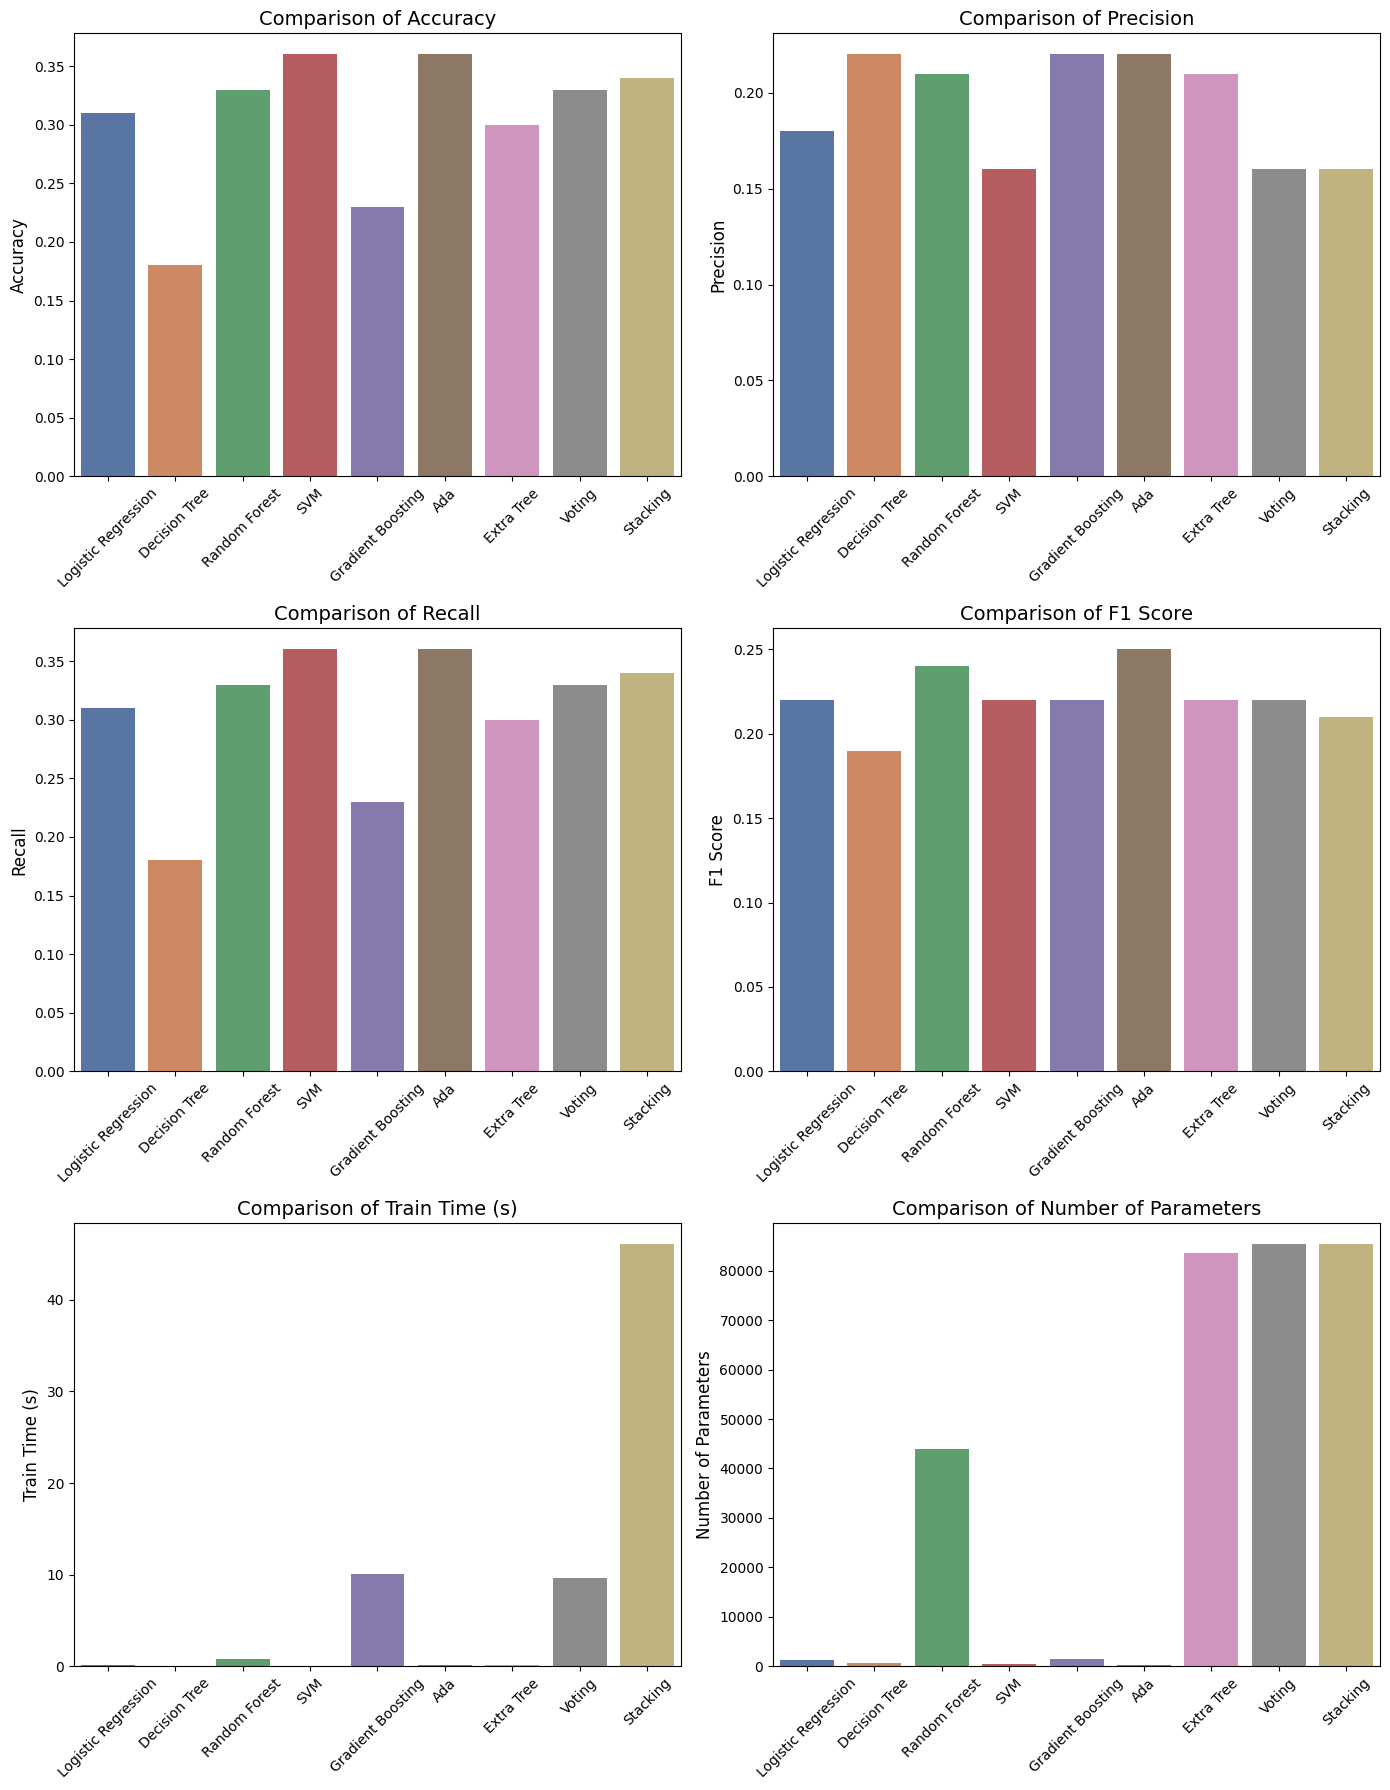

In [52]:
import seaborn as sns

# Plotting each metric in a separate subplot
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# List of metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Train Time (s)", "Number of Parameters"]
colors = sns.color_palette("deep", len(results_df_s))

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(x="Type", y=metric, data=results_df_s, ax=ax, palette=colors)
    ax.set_title(f'Comparison of {metric}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel(metric, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Model Performance Discussion

**Ada Boost**

AdaBoost is known for its ability to combine multiple weak classifiers into a strong classifier, which can lead to improved accuracy, especially in the presence of noise and outliers in data (Data Headhunters, 2024). In music classification, it is crucial to differentiate between subtle features that distinguish one genre from another.

**SVM and Logistic Regression**

Both SVM and Logistic Regression showed low precision; this indicates that while these models can separate genre classes to a degree, they are not as effective in predicting more nuanced differences between some genres. Precision is important in music genre classification because a miscalculation in a production environment could lead to a poor user experience in applications like music recommendation systems.

**Voting and Stacking**

These ensemble methods, which combine the predictions from multiple models, tend to show high accuracy and recall but suffer from long training times and high complexity. This might be due to the overhead of managing multiple learners and aggregating their predictions. Although robust in accuracy, the practical deployment of Voting and Stacking might be problematic for real-time systems or applications with limited computational resources, such as mobile apps for music streaming.

## Conclusion & Recommendations

### Conclusion

This report has systematically evaluated several machine learning models, particularly focusing on their applicability to music genre classification based on a dataset from Spotify. The AdaBoost model emerged as the most effective, demonstrating a commendable balance between accuracy and recall, while maintaining manageable training times and complexity. This finding underscores the suitability of AdaBoost for scenarios where both performance and computational efficiency are paramount. Meanwhile, other ensemble methods like Voting and Stacking exhibited robust accuracy and recall but were hampered by high complexity and extended training durations, which could impede deployments in scalable environments.

### Recommendations

Given the promising results of around 36% accuracy obtained with the AdaBoost model on the small dataset, further research could explore enhancements such as parameter tuning and the integration of larger and more diverse data sources to refine its predictive accuracy. Moreover, experimenting with a combination of models in a hybrid framework could potentially leverage the individual strengths of each model to further enhance the overall system performance.

The dimensionality reduction techniques, particularly PCA and UMAP, did not yield the expected enhancements in model performance. Future efforts might focus on refining these techniques to better capture the nuances of musical features that are crucial for genre classification without compromising the integrity of the data.

A more nuanced analysis of the features, by integrating sophisticated feature selection techniques, could reveal deeper insights and enhance the model’s predictive accuracy. It appears that certain attributes, such as the year of release and song duration, may not significantly influence genre classification.



## References

*to The Stacking Classifier*. Retrieved from TowardDataScience.com: https://towardsdatascience.com/ensemble-methods-comparing-scikit-learns-voting-classifier-to-the-stacking-classifier-f5ab1ed1a29d

Data Headhunters. (2024, June 2). *Gradient Boosting vs AdaBoost: Battle of the Algorithms*. Retrieved from Data Headhunters: https://dataheadhunters.com/academy/gradient-boosting-vs-adaboost-battle-of-the-algorithms/#:~:text=The%20most%20significant%20difference%20is,which%20AdaBoost%20does%20not%20do.

De Bruyne, S., Plastria, F., & Carrizosa, E. (2008). *Dimensionality Reduction for Classification: Comparison of Techniques and Dimension Choice.* Brussels: Vrije Universiteit Brussel.

Evidently AI. (2024, June 4). *A complete guide to classification metrics in machine learning* . Retrieved from Evidently AI: https://www.evidentlyai.com/classification-metrics

Jolliffe, I., & Cadima, J. (2024, May 30). *Principal component analysis: a review and recent developments*. Retrieved from Royal Society Publishing: https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202

Jolliffe, I., & Cadima, J. (2024, June 2). *Principal component analysis: a review and recent developments*. Retrieved from The Royal Society: https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202

Kanade, V. (2016, November 2). *Machine Learning - MT 2016 8. Classification: Logistic Regression*. Retrieved from University of Oxford: https://www.cs.ox.ac.uk/people/varun.kanade/teaching/ML-MT2016/slides/slides08.pdf

Kulkarni, A., & Shrestha, A. (2017). *Multispectral Image Analysis using Decision Trees.* Tyler: University of Texas At Tyler.

MathWorks. (2024, June 2). *Support Vector Machines for Binary Classification* . Retrieved from Mathworks: https://uk.mathworks.com/help/stats/support-vector-machines-for-binary-classification.html

McInnes, L., Healy, J., & Melville, J. (2018). *UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction.* Ithaca: Cornell University.